# Author & Title Extraction

In [58]:
# load module
import glob
import os
#pip install PyPDF2 # download
import PyPDF2 as pdf
from PyPDF2 import PdfFileWriter, PdfFileReader

In [59]:
# file path I
pdf_path = '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10'
#pdfs = os.listdir(filePath)
pdfs = glob.glob("{}/*.pdf".format(pdf_path))
pdfs

['/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Charoenlarp 1973.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Camargo 2012.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Cabalda 2009.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Benjeddou 2019.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Chimhashu 2018.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Bates 1994.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Cao 2013.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Carter 1969.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Charoenlarp 1980.pdf',
 '/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Cavan 1993.pdf']

In [60]:
# extract function
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def extract_pdf_content(pdf):
    rsrcmgr = PDFResourceManager()
    codec = 'utf-8'
    outfp = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr=rsrcmgr, outfp=outfp, codec=codec, laparams=laparams)
    with open(pdf, 'rb') as fp:
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        maxpages = 0
        caching = True
        pagenos=set()
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
            interpreter.process_page(page)
    mystr = outfp.getvalue()
    device.close()
    outfp.close()
    return mystr

In [61]:
content = extract_pdf_content(pdfs[1])
#content
#print(content)

In [62]:
mydict = {}
for pdf in pdfs:
    key = pdf.split('/')[-1]
    if not key in mydict:
        print("Extracting content from {} ...".format(pdf))
        mydict[key] = extract_pdf_content(pdf)

Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Charoenlarp 1973.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Camargo 2012.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Cabalda 2009.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Benjeddou 2019.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Chimhashu 2018.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Bates 1994.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Cao 2013.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Carter 1969.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Charoenlarp 1980.pdf ...
Extracting content from /Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Cavan 1993.pdf ...


In [63]:
mydict.keys()

dict_keys(['Charoenlarp 1973.pdf', 'Camargo 2012.pdf', 'Cabalda 2009.pdf', 'Benjeddou 2019.pdf', 'Chimhashu 2018.pdf', 'Bates 1994.pdf', 'Cao 2013.pdf', 'Carter 1969.pdf', 'Charoenlarp 1980.pdf', 'Cavan 1993.pdf'])

In [64]:
import pandas as pd
df = pd.DataFrame.from_dict(mydict, orient = 'index').reset_index()
df.columns = ["path", "content"]
df

,path,content
0,Charoenlarp 1973.pdf,
1,Camargo 2012.pdf,Randomized Trial of Vitamin D Supplementation ...
2,Cabalda 2009.pdf,Journal of the American College of Nutrition\n...
3,Benjeddou 2019.pdf,461\n\nARTICLE\n\nEffect of multiple micronutr...
4,Chimhashu 2018.pdf,"British Journal of Nutrition (2018), 119, 610–..."
5,Bates 1994.pdf,"British Journal of Nutrition (1994) 72, 601-..."
6,Cao 2013.pdf,214 ...
7,Carter 1969.pdf,TIlE\n\nAMERICAN\n\nJOURNAL\n\nOF CLINICAL\n\n...
8,Charoenlarp 1980.pdf,
9,Cavan 1993.pdf,Growth\nchildren\nintervention\n\nand\nbody\ni...


In [65]:
# Number of words in a pdf
df["length"] = df.content.apply(lambda x: len(x))
df.head()

,path,content,length
0,Charoenlarp 1973.pdf,,5
1,Camargo 2012.pdf,Randomized Trial of Vitamin D Supplementation ...,35528
2,Cabalda 2009.pdf,Journal of the American College of Nutrition\n...,47156
3,Benjeddou 2019.pdf,461\n\nARTICLE\n\nEffect of multiple micronutr...,42246
4,Chimhashu 2018.pdf,"British Journal of Nutrition (2018), 119, 610–...",53178


In [66]:
new = df["path"].str.split(".", expand = True)[0].str.split(" ", expand = True) 
df['Author'] = new[0]
df['Year'] = new[1]
df.head()

,path,content,length,Author,Year
0,Charoenlarp 1973.pdf,,5,Charoenlarp,1973
1,Camargo 2012.pdf,Randomized Trial of Vitamin D Supplementation ...,35528,Camargo,2012
2,Cabalda 2009.pdf,Journal of the American College of Nutrition\n...,47156,Cabalda,2009
3,Benjeddou 2019.pdf,461\n\nARTICLE\n\nEffect of multiple micronutr...,42246,Benjeddou,2019
4,Chimhashu 2018.pdf,"British Journal of Nutrition (2018), 119, 610–...",53178,Chimhashu,2018


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

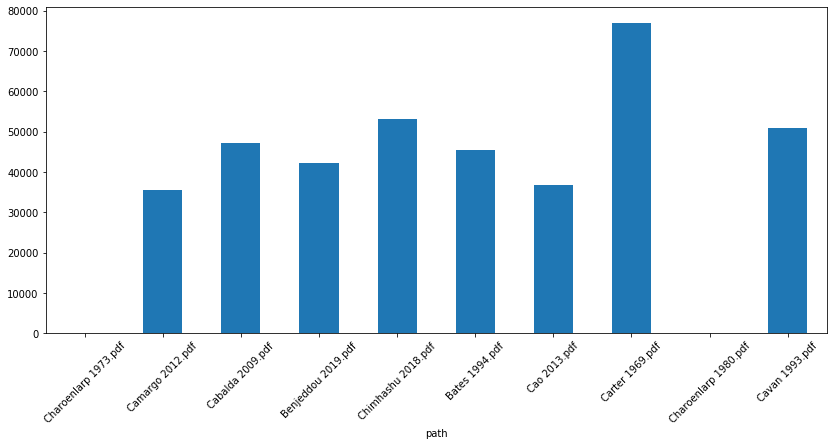

In [67]:
# words visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
df.set_index('path').length.plot(kind='bar')
plt.xticks(rotation=45)

In [68]:
def get_mydict_from_pdf_path(mydict, pdf_path):
    pdfs = glob.glob("{}/*.pdf".format(pdf_path))
    for pdf in pdfs:
        key = pdf.split('/')[-1]
        if not key in mydict:
            print("Extracting content from {} ...".format(pdf))
            mydict[key] = extract_pdf_content(pdf)
    return mydict

In [69]:
def make_df_from_mydict(mydict):
    df = pd.DataFrame.from_dict(mydict, orient='index').reset_index()
    df.columns = ["path", "content"]
    return df

In [70]:
def draw_df(df):
    df["length"] = df.content.apply(lambda x: len(x))
    plt.figure(figsize=(14, 6))
    df.set_index('path').length.plot(kind='bar')
    plt.xticks(rotation=45)

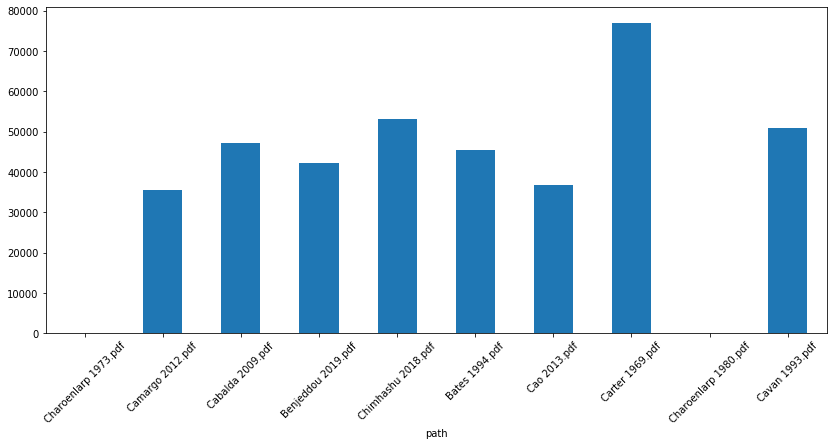

In [71]:
mydict = get_mydict_from_pdf_path(mydict, pdf_path)
df = make_df_from_mydict(mydict)
draw_df(df)

In [72]:
# output
df.to_csv('filename and content extraction.csv', index = False)

In [7]:
# file path
file_path = open('/Users/yanxiaoyu/Desktop/Graduate/RA/part3_10/Bates 1994.pdf', 'rb')
# read pdf
pdf_reader = PdfFileReader(file_path)

In [8]:
# get document info
pdf_reader.getDocumentInfo()

{'/Author': 'C. J. Bates, P. H. Evans, G. Allison, B. J. Sonko, S. Hoare, S. Goodrich and T. Aspray',
 '/CreationDate': "D:20050513080051+06'00'",
 '/Creator': 'Acrobat 5.0 Paper Capture Plug-in for Windows',
 '/ModDate': "D:20200917220706-07'00'",
 '/Producer': 'PDFlib PLOP 2.1.0 (sunOS)/Acrobat 4.0 Import Plug-in for Windows',
 '/Subject': 'British Journal of Nutrition',
 '/Title': 'Biochemical indices and neuromuscular function tests in rural Gambian schoolchildren given a riboflavin, or multivitamin plus iron, supplement'}

In [10]:
# get title
pdf_reader.getDocumentInfo().title

'Biochemical indices and neuromuscular function tests in rural Gambian schoolchildren given a riboflavin, or multivitamin plus iron, supplement'